# Project - `Chinese Car Company Price Prediction `

## Car Price Prediction Assignment
#### Problem Statement:
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.
The company wants to know:

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car

##  Reading and Understanding the Data

In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows',300)
pd.set_option('display.max_columns',300)

In [3]:
#load the dataset
cars = pd.read_csv('CarPrice_Assignment.csv')
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
#cheking the shape of dataframe
cars.shape

(205, 26)

In [5]:
#checking info
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
#convert type of column
cars['symboling']=cars['symboling'].astype(str)
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    object 
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
cars.describe()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Data Cleaning

In [8]:
#dropping the 'car id' column because it just use as a reference 
cars=cars.drop('car_ID',axis=1)

In [9]:
cars.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#### There is a column named 'CarName' which is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'. For example, 'audi 100 ls' has 'audi' as the car company name and '100 ls' as the car model name. You need to consider only company name as the independent variable for model building. 

In [10]:
cars['CarCompany'] = cars['CarName'].apply(lambda x:x.split(' ')[0])

In [11]:
#checking the head
cars.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [12]:
#check unique values
cars['CarCompany'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [13]:
# replace misspelled words which are given below :
# 'alfa-romero' is typing error as the name of the chinese car company is 'alfa-romeo'
# 'maxda' is typing error as the name of the chinese car company is 'mazda'
# 'porcshce' is typing error as the name of the chinese car company is 'porsche'
# 'toyouta' is typing error as the name of the chinese car company is 'toyota'
# 'vokswagen' & vw are typing errors as the name of the chinese car company is 'volkswagen'
# 'nissan' and 'Nissan' both are the same company names.

In [14]:
cars['CarCompany'] = cars['CarCompany'].apply(lambda x:x.lower())

In [15]:
#again check unique values
cars['CarCompany'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [16]:
# replace misspelled words
cars['CarCompany'] = cars['CarCompany'].replace({'alfa-romero':'alfa-romeo','maxda':'mazda', 'porcshce': 'porsche', 'toyouta':'toyota', 'vokswagen':'volkswagen', 'vw':'volkswagen'})

In [17]:
#again check unique values
cars['CarCompany'].unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [18]:
#showing head of df
cars.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romeo
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romeo
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romeo
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [19]:
cars['drivewheel'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

#### As we can see clearly there are some values in 'drivewheel' variable as '4wd' so correcting it to 'fwd'.

In [20]:
cars['drivewheel'] = pd.Series(map(lambda x:'fwd' if x=='4wd' else x , cars['drivewheel']))

In [21]:
#show head
cars.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romeo
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romeo
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romeo
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,audi 100ls,gas,std,four,sedan,fwd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [22]:
#cars.loc[:, ['carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype','cylindernumber', 'enginesize']].head()

In [23]:
#check all the unqiue values of categorical column
print(cars['symboling'].unique())
print("\n")
print(cars['CarCompany'].unique())
print("\n")
print(cars['fueltype'].unique())
print("\n")
print(cars['aspiration'].unique())
print("\n")
print(cars['doornumber'].unique())
print("\n")
print(cars['carbody'].unique())
print("\n")
print(cars['drivewheel'].unique())
print("\n")
print(cars['enginelocation'].unique())
print("\n")
print(cars['enginetype'].unique())
print("\n")
print(cars['cylindernumber'].unique())
print("\n")
print(cars['fuelsystem'].unique())

['3' '1' '2' '0' '-1' '-2']


['alfa-romeo' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


['gas' 'diesel']


['std' 'turbo']


['two' 'four']


['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']


['rwd' 'fwd']


['front' 'rear']


['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']


['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [24]:
# as cylindernumer is given in string format so mapping it to the relevant numeric value
cars['cylindernumber'] = cars['cylindernumber'].replace({'four':4, 'six': 6, 'five':5 , 'three':3, 'twelve':12, 'two':2 , 'eight' : 8})
cars['cylindernumber'].unique()

array([ 4,  6,  5,  3, 12,  2,  8], dtype=int64)

In [25]:
#printing head
cars.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romeo
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romeo
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romeo
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,audi 100ls,gas,std,four,sedan,fwd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


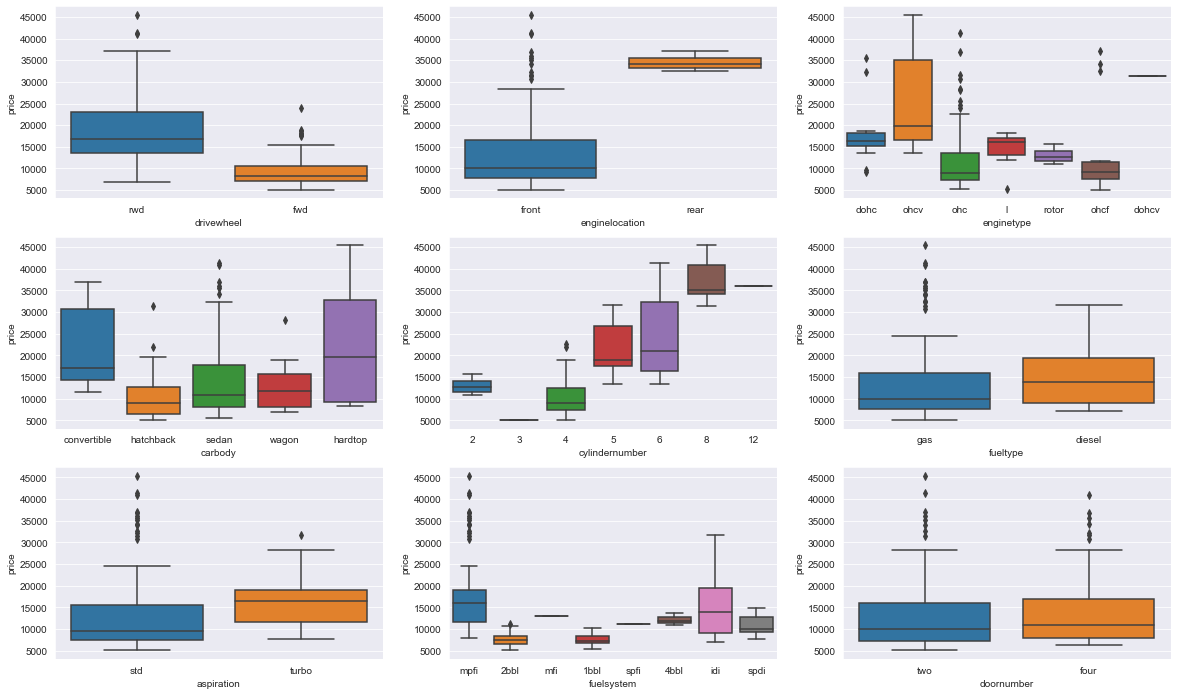

In [26]:
#visualizing the categorical variables
sb.set_style('darkgrid')
plt.figure(figsize=(20,12))
plt.subplot(3,3,1)
sb.boxplot(x='drivewheel',y='price',data=cars)
plt.subplot(3,3,2)
sb.boxplot(x='enginelocation',y='price',data=cars)
plt.subplot(3,3,3)
sb.boxplot(x='enginetype',y='price',data=cars)
plt.subplot(3,3,4)
sb.boxplot(x='carbody',y='price',data=cars)
plt.subplot(3,3,5)
sb.boxplot(x='cylindernumber',y='price',data=cars)
plt.subplot(3,3,6)
sb.boxplot(x='fueltype',y='price',data=cars)
plt.subplot(3,3,7)
sb.boxplot(x='aspiration',y='price',data=cars)
plt.subplot(3,3,8)
sb.boxplot(x='fuelsystem',y='price',data=cars)
plt.subplot(3,3,9)
sb.boxplot(x='doornumber',y='price',data=cars)
plt.show()

#### Insights
#### 1. doornumbers dont affect the prices of a car   
#### 2. Rear enginelocation has very high price comparitively with front location 
#### 3. prices are affected by numbers of cylindernumber
#### 4. rwd has higher avg. prices 
#### 5. turbo aspiration has more prices  
#### 6.  hardtop and convertible carbody has higher prices than others 
#### 7. Diesel Cars has comparatively more car prices than gas car 

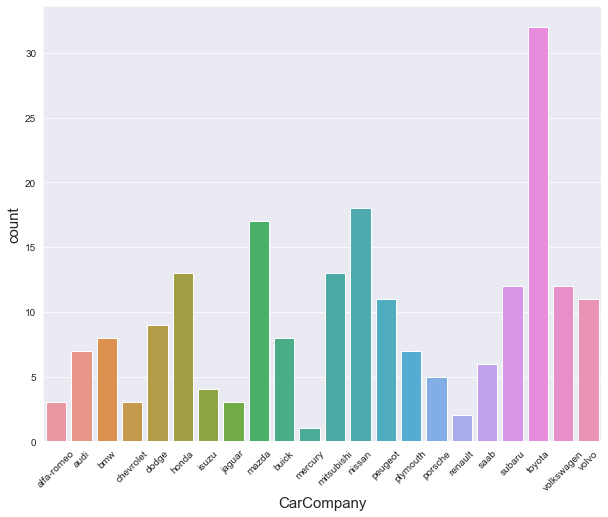

In [27]:
plt.figure(figsize=(10,8))
#cars['CarCompany'].value_counts().plot(kind='bar')
plt.xlabel("Car Company",fontsize = '15')
plt.ylabel("Number of Cars",fontsize = '15')
plt.xticks(rotation=45)
sb.countplot(cars['CarCompany'])
plt.show()

#### Insight
#### 1. toyota is most preferable car brand .
#### 2. mercury is least preferable car brand.

### Derived Matrices

In [28]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    object 
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    int64  
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

#### As We know that we can derive 'Bore_stroke_ratio' from 'boreratio' & 'stroke' which helps us to see the reflection the price using following formula -
#### Formula - `Bore_stroke_ratio = boreratio/stroke `

In [29]:
cars['Bore_stroke_ratio'] = cars['boreratio']/cars['stroke']

#### As We know that we can derive 'wheel_len_ratio' from 'wheelbase' & 'carlength' which helps us to see the reflection the price using following formula -
#### Formula - `wheel_len_ratio = wheelbase/carlength `

In [30]:
cars['wheel_len_ratio'] = cars['wheelbase']/cars['carlength']

#### As We know that we can derive 'torque' from 'horsepower' & 'peakrpm' which helps us to see the reflection the price using following formula -
#### Formula - `torque = (63025 * horsepower/peakrpm) `

In [31]:
cars['torque'] = (63025 * cars['horsepower']/cars['peakrpm'])

#### As We know that we can derive 'displacement' from 'stroke' , 'boreratio' & 'cylindernumber' which helps us to see the reflection the price using following formula -
#### Formula - `displacement =  ((np.pi)/4)*stroke*(boreratio**2)*cylindernumber `

In [32]:
cars['displacement'] = ((np.pi)/4)*cars['stroke']*(cars['boreratio']**2)*cars['cylindernumber']

#### As We know that we can derive 'volume' from 'carlength' , 'carwidth' & 'carheight' which helps us to see the reflection the price using following formula -
#### Formula - `volume =  carlength*carwidth*carheight`

In [33]:
cars['volume'] = cars['carlength']*cars['carwidth']*cars['carheight']

In [34]:
# Now looking to the df
cars.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,Bore_stroke_ratio,wheel_len_ratio,torque,displacement,volume
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romeo,1.294776,0.524882,1399.155000,101.377976,528019.904
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romeo,1.294776,0.524882,1399.155000,101.377976,528019.904
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romeo,0.772334,0.551986,1941.170000,117.446531,587592.640
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,0.938235,0.565119,1168.827273,108.695147,634816.956
4,2,audi 100ls,gas,std,four,sedan,fwd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,0.938235,0.562854,1317.795455,135.868934,636734.832


In [35]:
#cars.loc[:, ['carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
 #            'cylindernumber', 'enginesize' , 'fuelsystem', 'boreratio']].head()

In [36]:
cars['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

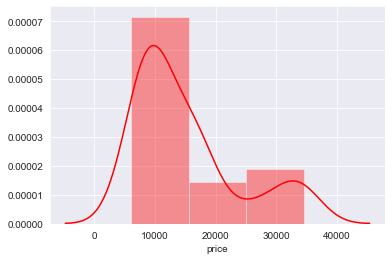

In [37]:
sb.distplot(cars.groupby('CarCompany')['price'].mean().sort_values(ascending=False),color ='r',bins=3)

### Insight
### From the above distribution it is clearly seen that there are 3 ranges of cars i.e from 5000-10000,10000-20000 and 20000-46000

In [38]:
#create a function to check prices of the car and group into different categories
def func(x):
    if x>=5000 and x<=10000:
        return "Low"
    elif x>=10001 and x<=20000:
        return "Medium"
    elif x>=20001 and x<=46000:
        return "High"

In [39]:
#apply func on price column to derive new column
cars['CarComp']=cars['price'].apply(func)

In [40]:
#show header
cars.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany,Bore_stroke_ratio,wheel_len_ratio,torque,displacement,volume,CarComp
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romeo,1.294776,0.524882,1399.155000,101.377976,528019.904,Medium
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romeo,1.294776,0.524882,1399.155000,101.377976,528019.904,Medium
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romeo,0.772334,0.551986,1941.170000,117.446531,587592.640,Medium
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,0.938235,0.565119,1168.827273,108.695147,634816.956,Medium
4,2,audi 100ls,gas,std,four,sedan,fwd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,0.938235,0.562854,1317.795455,135.868934,636734.832,Medium


In [41]:
print(cars[(cars['price'] > 5000) & (cars['price'] < 10000)].CarComp.unique())
print(cars[(cars['price'] >= 10000) & (cars['price'] < 20000)].CarComp.unique())
print(cars[(cars['price'] > 20000)].CarComp.unique())

['Low']
['Medium']
['High']


In [42]:
cars.loc[:,cars.dtypes != 'object'].head()

,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Bore_stroke_ratio,wheel_len_ratio,torque,displacement,volume
0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0,1.294776,0.524882,1399.155000,101.377976,528019.904
1,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0,1.294776,0.524882,1399.155000,101.377976,528019.904
2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0.772334,0.551986,1941.170000,117.446531,587592.640
3,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0.938235,0.565119,1168.827273,108.695147,634816.956
4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0.938235,0.562854,1317.795455,135.868934,636734.832


In [43]:
num_cols = cars.loc[:,cars.dtypes != 'object'].columns

In [44]:
#checking price correlation with numerical variables
cor=cars[num_cols].corr().round(2)
cor

,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Bore_stroke_ratio,wheel_len_ratio,torque,displacement,volume
wheelbase,1.00,0.87,0.80,0.59,0.78,0.34,0.57,0.49,0.16,0.25,0.35,-0.36,-0.47,-0.54,0.58,0.18,-0.06,0.47,0.53,0.91
carlength,0.87,1.00,0.84,0.49,0.88,0.43,0.68,0.61,0.13,0.16,0.55,-0.29,-0.67,-0.70,0.68,0.27,-0.53,0.64,0.63,0.95
carwidth,0.80,0.84,1.00,0.28,0.87,0.55,0.74,0.56,0.18,0.18,0.64,-0.22,-0.64,-0.68,0.76,0.20,-0.34,0.71,0.72,0.83
carheight,0.59,0.49,0.28,1.00,0.30,-0.01,0.07,0.17,-0.06,0.26,-0.11,-0.32,-0.05,-0.11,0.12,0.13,0.02,-0.03,0.06,0.70
curbweight,0.78,0.88,0.87,0.30,1.00,0.61,0.85,0.65,0.17,0.15,0.75,-0.27,-0.76,-0.80,0.84,0.27,-0.45,0.83,0.80,0.82
cylindernumber,0.34,0.43,0.55,-0.01,0.61,1.00,0.85,0.23,0.01,-0.02,0.69,-0.12,-0.45,-0.47,0.72,0.12,-0.28,0.73,0.85,0.37
enginesize,0.57,0.68,0.74,0.07,0.85,0.85,1.00,0.58,0.20,0.03,0.81,-0.24,-0.65,-0.68,0.87,0.20,-0.41,0.89,0.97,0.59
boreratio,0.49,0.61,0.56,0.17,0.65,0.23,0.58,1.00,-0.06,0.01,0.57,-0.25,-0.58,-0.59,0.55,0.64,-0.41,0.63,0.61,0.54
stroke,0.16,0.13,0.18,-0.06,0.17,0.01,0.20,-0.06,1.00,0.19,0.08,-0.07,-0.04,-0.04,0.08,-0.79,0.01,0.12,0.27,0.10
compressionratio,0.25,0.16,0.18,0.26,0.15,-0.02,0.03,0.01,0.19,1.00,-0.20,-0.44,0.32,0.27,0.07,-0.14,0.10,-0.10,0.04,0.23


## Co-Relation Using Heat Map

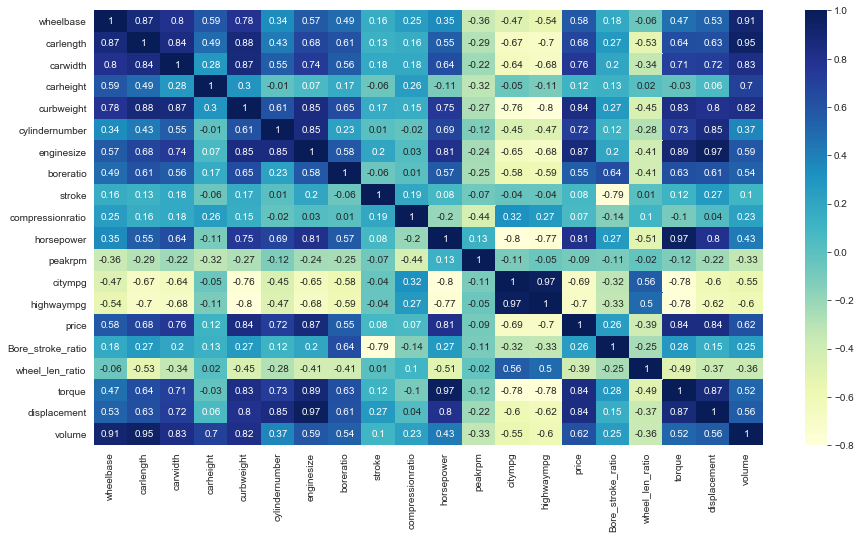

In [45]:
plt.figure(figsize=(15,8))
sb.heatmap(cor,annot=True,cmap='YlGnBu')

### co-relation matrix shows highly co-related numerical columns w.r.t target column/columns

#### After Visualization there are some significant variables w.r.t to price (which directly impact price column)

In [46]:
#removing all the unnecessary columns
cars2 = cars.drop(columns = ['symboling','doornumber','CarName','CarCompany'])
#cars2.loc[:,cars2.dtypes != 'object'].head()
#cars2.loc[:,cars2.dtypes == 'object'].head()

In [47]:
cars2.head()

,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Bore_stroke_ratio,wheel_len_ratio,torque,displacement,volume,CarComp
0,gas,std,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,1.294776,0.524882,1399.155000,101.377976,528019.904,Medium
1,gas,std,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,1.294776,0.524882,1399.155000,101.377976,528019.904,Medium
2,gas,std,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,0.772334,0.551986,1941.170000,117.446531,587592.640,Medium
3,gas,std,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,0.938235,0.565119,1168.827273,108.695147,634816.956,Medium
4,gas,std,sedan,fwd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,0.938235,0.562854,1317.795455,135.868934,636734.832,Medium


### Dummy Variables

In [48]:
cars2.loc[:,cars2.dtypes == 'object'].head()

,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,CarComp
0,gas,std,convertible,rwd,front,dohc,mpfi,Medium
1,gas,std,convertible,rwd,front,dohc,mpfi,Medium
2,gas,std,hatchback,rwd,front,ohcv,mpfi,Medium
3,gas,std,sedan,fwd,front,ohc,mpfi,Medium
4,gas,std,sedan,fwd,front,ohc,mpfi,Medium


In [49]:
print(cars2.fueltype.unique())
print("Length (fueltype)=", cars2.fueltype.nunique())
print("\n")

print(cars2.aspiration.unique())
print("Length (aspiration)=", cars2.aspiration.nunique())
print("\n")

print(cars2.drivewheel.unique())
print("Length (drivewheel)=", cars2.drivewheel.nunique())
print("\n")

print(cars2.enginelocation.unique())
print("Length (enginelocation)=", cars2.enginelocation.nunique())
print("\n")

print(cars2.carbody.unique())
print("Length (carbody)=", cars2.carbody.nunique())
print("\n")

print(cars2.enginetype.unique())
print("Length (enginetype)=", cars2.enginetype.nunique())
print("\n")

print(cars2.fuelsystem.unique())
print("Length (fuelsystem)=", cars2.fuelsystem.nunique())
print("\n")

print(cars2.CarComp.unique())
print("Length (CarComp)=", cars2.CarComp.nunique())

['gas' 'diesel']
Length (fueltype)= 2


['std' 'turbo']
Length (aspiration)= 2


['rwd' 'fwd']
Length (drivewheel)= 2


['front' 'rear']
Length (enginelocation)= 2


['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
Length (carbody)= 5


['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
Length (enginetype)= 7


['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
Length (fuelsystem)= 8


['Medium' 'High' 'Low']
Length (CarComp)= 3


In [50]:
varlist = list(cars2.loc[:,cars2.dtypes == 'object'].columns)
varlist

['fueltype',
 'aspiration',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'fuelsystem',
 'CarComp']

In [51]:
#DUMMY VARIABLES 

cardummies=pd.get_dummies(data=cars2[varlist],drop_first=True)
cardummies.head()

,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CarComp_Low,CarComp_Medium
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
3,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
4,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1


In [52]:
#concatenate the dummies with df
cars2 = pd.concat([cars2, cardummies], axis=1)
cars2.head()

,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Bore_stroke_ratio,wheel_len_ratio,torque,displacement,volume,CarComp,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CarComp_Low,CarComp_Medium
0,gas,std,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,1.294776,0.524882,1399.155000,101.377976,528019.904,Medium,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,gas,std,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,1.294776,0.524882,1399.155000,101.377976,528019.904,Medium,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,gas,std,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,0.772334,0.551986,1941.170000,117.446531,587592.640,Medium,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
3,gas,std,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,0.938235,0.565119,1168.827273,108.695147,634816.956,Medium,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
4,gas,std,sedan,fwd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,0.938235,0.562854,1317.795455,135.868934,636734.832,Medium,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1


In [53]:
#dropping unnecessary columns which are not useful in model building
to_drop = cars2.loc[:,cars2.dtypes == 'object'].columns
to_drop

Index(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation',
       'enginetype', 'fuelsystem', 'CarComp'],
      dtype='object')

In [54]:
cars2 = cars2.drop(columns = to_drop)
cars2.head()

,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Bore_stroke_ratio,wheel_len_ratio,torque,displacement,volume,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CarComp_Low,CarComp_Medium
0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0,1.294776,0.524882,1399.155000,101.377976,528019.904,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0,1.294776,0.524882,1399.155000,101.377976,528019.904,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0.772334,0.551986,1941.170000,117.446531,587592.640,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
3,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0.938235,0.565119,1168.827273,108.695147,634816.956,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0.938235,0.562854,1317.795455,135.868934,636734.832,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1


In [55]:
cars2.shape

(205, 43)

In [56]:
#check empty data 
cars2.isnull().sum()

wheelbase              0
carlength              0
carwidth               0
carheight              0
curbweight             0
cylindernumber         0
enginesize             0
boreratio              0
stroke                 0
compressionratio       0
horsepower             0
peakrpm                0
citympg                0
highwaympg             0
price                  0
Bore_stroke_ratio      0
wheel_len_ratio        0
torque                 0
displacement           0
volume                 0
fueltype_gas           0
aspiration_turbo       0
carbody_hardtop        0
carbody_hatchback      0
carbody_sedan          0
carbody_wagon          0
drivewheel_rwd         0
enginelocation_rear    0
enginetype_dohcv       0
enginetype_l           0
enginetype_ohc         0
enginetype_ohcf        0
enginetype_ohcv        0
enginetype_rotor       0
fuelsystem_2bbl        0
fuelsystem_4bbl        0
fuelsystem_idi         0
fuelsystem_mfi         0
fuelsystem_mpfi        0
fuelsystem_spdi        0


##  Splitting the Data into Training and Testing Sets

In [57]:
# Splitting The data into training and test set

df_train,df_test=train_test_split(cars2,test_size=0.3,random_state=100)
print(df_train.shape)
print(df_test.shape)

(143, 43)
(62, 43)


In [58]:
#Scale the features
num_vars = list(cars2.loc[:,cars2.dtypes != 'uint8'].columns)
scalar = MinMaxScaler()
df_train[num_vars] = scalar.fit_transform(df_train[num_vars])

df_train.head()

,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Bore_stroke_ratio,wheel_len_ratio,torque,displacement,volume,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CarComp_Low,CarComp_Medium
122,0.244828,0.426016,0.291667,0.265487,0.272692,0.2,0.139623,0.230159,0.525253,0.15000,0.083333,0.551020,0.500000,0.567568,0.068818,0.182238,0.346277,0.068667,0.121850,0.243366,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
125,0.272414,0.452033,0.666667,0.212389,0.500388,0.2,0.339623,1.000000,0.464646,0.15625,0.395833,0.551020,0.166667,0.270270,0.466890,0.612385,0.340677,0.385878,0.352697,0.343542,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
166,0.272414,0.448780,0.308333,0.424779,0.314973,0.2,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.324324,0.122110,0.346239,0.347204,0.175814,0.166663,0.313145,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0.068966,0.450407,0.316667,0.088496,0.411171,0.2,0.260377,0.626984,0.247475,0.12500,0.262500,0.346939,0.222222,0.270270,0.314446,0.646927,0.000000,0.297482,0.165928,0.204773,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
199,0.610345,0.775610,0.575000,0.858407,0.647401,0.2,0.260377,0.746032,0.484848,0.03125,0.475000,0.387755,0.111111,0.135135,0.382131,0.466672,0.271144,0.519978,0.271036,0.752188,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1


In [59]:
df_train.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Bore_stroke_ratio,wheel_len_ratio,torque,displacement,volume,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CarComp_Low,CarComp_Medium
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0,143.000000,143.000000
mean,0.411141,0.525476,0.461655,0.509004,0.407878,0.240559,0.241351,0.497946,0.535389,0.190787,0.227302,0.400029,0.344211,0.374976,0.219310,0.318526,0.434030,0.248362,0.252009,0.437947,0.909091,0.181818,0.020979,0.342657,0.475524,0.132867,0.349650,0.006993,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0,0.496503,0.363636
std,0.205581,0.204848,0.184517,0.215378,0.211269,0.115818,0.154619,0.207140,0.157843,0.237181,0.165511,0.196438,0.186165,0.188477,0.215682,0.189892,0.203506,0.178454,0.163518,0.216789,0.288490,0.387050,0.143818,0.476266,0.501156,0.340624,0.478536,0.083624,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0,0.501745,0.482737
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.272414,0.399187,0.304167,0.353982,0.245539,0.200000,0.135849,0.305556,0.464646,0.100000,0.091667,0.265306,0.166667,0.216216,0.067298,0.198379,0.315097,0.097427,0.149174,0.280120,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
50%,0.341379,0.502439,0.425000,0.522124,0.355702,0.200000,0.184906,0.500000,0.545455,0.125000,0.191667,0.428571,0.333333,0.378378,0.140343,0.252342,0.395916,0.191571,0.195090,0.385733,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
75%,0.503448,0.669919,0.550000,0.668142,0.559542,0.200000,0.301887,0.682540,0.611111,0.150000,0.283333,0.551020,0.500000,0.527027,0.313479,0.347300,0.522030,0.319000,0.319546,0.563951,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000


### Dividing into X and Y sets for the model building

In [60]:
# Divide into X & y sets
y_train = df_train.pop('price')
X_train  = df_train

In [61]:
X_train.shape

(143, 42)

In [62]:
y_train.shape

(143,)

In [63]:
X_train.head()

,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,Bore_stroke_ratio,wheel_len_ratio,torque,displacement,volume,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CarComp_Low,CarComp_Medium
122,0.244828,0.426016,0.291667,0.265487,0.272692,0.2,0.139623,0.230159,0.525253,0.15000,0.083333,0.551020,0.500000,0.567568,0.182238,0.346277,0.068667,0.121850,0.243366,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
125,0.272414,0.452033,0.666667,0.212389,0.500388,0.2,0.339623,1.000000,0.464646,0.15625,0.395833,0.551020,0.166667,0.270270,0.612385,0.340677,0.385878,0.352697,0.343542,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
166,0.272414,0.448780,0.308333,0.424779,0.314973,0.2,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.324324,0.346239,0.347204,0.175814,0.166663,0.313145,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0.068966,0.450407,0.316667,0.088496,0.411171,0.2,0.260377,0.626984,0.247475,0.12500,0.262500,0.346939,0.222222,0.270270,0.646927,0.000000,0.297482,0.165928,0.204773,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
199,0.610345,0.775610,0.575000,0.858407,0.647401,0.2,0.260377,0.746032,0.484848,0.03125,0.475000,0.387755,0.111111,0.135135,0.466672,0.271144,0.519978,0.271036,0.752188,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1


In [64]:
y_train.head()

122    0.068818
125    0.466890
166    0.122110
1      0.314446
199    0.382131
Name: price, dtype: float64

## Building a model with RFE 
#### There are large amount of columns so building a model via Forward Selection or Backward Elimination will become a tedious task so we go with recursive feature elimination first then check its pvalues and VIF's

In [65]:
#fit a linear regression model in train dataset
lm =LinearRegression()
lm.fit(X_train,y_train)
rfe=RFE(lm,15)
rfe=rfe.fit(X_train,y_train)

In [66]:
#check ranking
rfe.ranking_

array([ 1,  1, 15, 25,  4,  1,  1,  1,  1,  1,  1, 16, 14,  5, 21,  1,  1,
        1, 18,  1, 19, 10,  7,  9,  6, 17,  2,  8, 20, 12, 13, 26,  3, 24,
       22,  1, 27, 23, 11, 28,  1,  1])

In [67]:
#check the columns which get highest ranking
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', True, 1),
 ('carlength', True, 1),
 ('carwidth', False, 15),
 ('carheight', False, 25),
 ('curbweight', False, 4),
 ('cylindernumber', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', True, 1),
 ('peakrpm', False, 16),
 ('citympg', False, 14),
 ('highwaympg', False, 5),
 ('Bore_stroke_ratio', False, 21),
 ('wheel_len_ratio', True, 1),
 ('torque', True, 1),
 ('displacement', True, 1),
 ('volume', False, 18),
 ('fueltype_gas', True, 1),
 ('aspiration_turbo', False, 19),
 ('carbody_hardtop', False, 10),
 ('carbody_hatchback', False, 7),
 ('carbody_sedan', False, 9),
 ('carbody_wagon', False, 6),
 ('drivewheel_rwd', False, 17),
 ('enginelocation_rear', False, 2),
 ('enginetype_dohcv', False, 8),
 ('enginetype_l', False, 20),
 ('enginetype_ohc', False, 12),
 ('enginetype_ohcf', False, 13),
 ('enginetype_ohcv', False, 26),
 ('enginetype_rotor', False, 3),
 ('fuelsystem_2bbl', False, 24),
 ('fuels

In [68]:
#check the high ranking columns
cols = X_train.columns[rfe.support_]
cols

Index(['wheelbase', 'carlength', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'wheel_len_ratio', 'torque',
       'displacement', 'fueltype_gas', 'fuelsystem_idi', 'CarComp_Low',
       'CarComp_Medium'],
      dtype='object')

In [69]:
#columns which do not get highest ranking in RFE
X_train.columns[~rfe.support_]

Index(['carwidth', 'carheight', 'curbweight', 'peakrpm', 'citympg',
       'highwaympg', 'Bore_stroke_ratio', 'volume', 'aspiration_turbo',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_rwd', 'enginelocation_rear',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')

### Building model using statsmodel, for the detailed statictics

In [70]:
# BUILD MODEL USING STATSMODEL
X_train_rfe=X_train[cols]

# Add a constant
X_train_rfe=sm.add_constant(X_train_rfe)

# Create a first fitted model
rfe_lm = sm.OLS(y_train,X_train_rfe).fit()

#check the summary
print(rfe_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     161.5
Date:                Wed, 06 May 2020   Prob (F-statistic):           4.34e-74
Time:                        12:40:10   Log-Likelihood:                 226.19
No. Observations:                 143   AIC:                            -422.4
Df Residuals:                     128   BIC:                            -377.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2377      0.197  

In [71]:
X1=X_train_rfe.drop('const',axis=1)

In [72]:
round(rfe_lm.pvalues,3).sort_values(ascending=False)

fueltype_gas        0.535
const               0.230
wheel_len_ratio     0.039
displacement        0.038
wheelbase           0.032
carlength           0.021
fuelsystem_idi      0.013
compressionratio    0.008
torque              0.003
CarComp_Medium      0.000
CarComp_Low         0.000
horsepower          0.000
stroke              0.000
boreratio           0.000
enginesize          0.000
cylindernumber      0.000
dtype: float64

In [73]:
#check VIF's
vif = pd.DataFrame()
vif['Features'] = X1.columns
vif['VIF'] = [variance_inflation_factor(X1.values,i) for i in range(X1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
11,fueltype_gas,3992.38
1,carlength,974.57
0,wheelbase,657.49
12,fuelsystem_idi,448.53
8,wheel_len_ratio,222.58
10,displacement,92.89
2,cylindernumber,53.39
6,compressionratio,46.79
9,torque,39.12
3,enginesize,28.45


In [74]:
X_train_rfe2=X1

### Dropping the variable and updating the model

In [75]:
X_train_rfe2=X_train_rfe2.drop('fueltype_gas',axis=1)

In [76]:
# Create a second model
X_train_rfe2=sm.add_constant(X_train_rfe2)
rfe_lm = sm.OLS(y_train,X_train_rfe2).fit()
print(rfe_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     161.5
Date:                Wed, 06 May 2020   Prob (F-statistic):           4.34e-74
Time:                        12:40:10   Log-Likelihood:                 226.19
No. Observations:                 143   AIC:                            -422.4
Df Residuals:                     128   BIC:                            -377.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1728      0.291  

In [77]:
X2=X_train_rfe2.drop('const',axis=1)

In [78]:
round(rfe_lm.pvalues,3).sort_values(ascending=False)

const               0.554
wheel_len_ratio     0.039
displacement        0.038
wheelbase           0.032
carlength           0.021
compressionratio    0.008
torque              0.003
fuelsystem_idi      0.001
CarComp_Medium      0.000
CarComp_Low         0.000
horsepower          0.000
stroke              0.000
boreratio           0.000
enginesize          0.000
cylindernumber      0.000
dtype: float64

In [79]:
vif = pd.DataFrame()
vif['Features'] = X2.columns
vif['VIF'] = [variance_inflation_factor(X2.values,i) for i in range(X2.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,carlength,977.94
0,wheelbase,460.68
10,displacement,271.25
2,cylindernumber,244.69
8,wheel_len_ratio,140.74
4,boreratio,122.35
9,torque,114.46
5,stroke,108.15
3,enginesize,96.80
6,compressionratio,77.28


In [80]:
X_train_rfe3=X2

In [81]:
#drop another variable high pvalue
X_train_rfe3=X_train_rfe3.drop('wheel_len_ratio',axis=1)

In [82]:
# Create a third fitted model
X_train_rfe3=sm.add_constant(X_train_rfe3)
rfe_lm = sm.OLS(y_train,X_train_rfe3).fit()
print(rfe_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     169.2
Date:                Wed, 06 May 2020   Prob (F-statistic):           2.73e-74
Time:                        12:40:11   Log-Likelihood:                 223.80
No. Observations:                 143   AIC:                            -419.6
Df Residuals:                     129   BIC:                            -378.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.7444      0.099  

In [83]:
X3=X_train_rfe3.drop('const',axis=1)

In [84]:
vif = pd.DataFrame()
vif['Features'] = X3.columns
vif['VIF'] = [variance_inflation_factor(X3.values,i) for i in range(X3.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
8,torque,114.13
9,displacement,100.64
3,enginesize,96.37
2,cylindernumber,71.57
6,compressionratio,70.95
7,horsepower,70.15
1,carlength,59.90
10,fuelsystem_idi,50.07
4,boreratio,30.79
0,wheelbase,28.61


In [85]:
round(rfe_lm.pvalues,3).sort_values(ascending=False)

wheelbase           0.316
displacement        0.024
compressionratio    0.015
carlength           0.005
fuelsystem_idi      0.002
torque              0.002
CarComp_Medium      0.000
CarComp_Low         0.000
horsepower          0.000
stroke              0.000
boreratio           0.000
enginesize          0.000
cylindernumber      0.000
const               0.000
dtype: float64

In [86]:
#high pvalues
X_train_rfe4=X3

In [87]:
#drop another variable because of high pvalue
X_train_rfe4=X_train_rfe4.drop('wheelbase',axis=1)

In [88]:
# Create a fourth fitted model
X_train_rfe4=sm.add_constant(X_train_rfe4)
rfe_lm = sm.OLS(y_train,X_train_rfe4).fit()
print(rfe_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     183.2
Date:                Wed, 06 May 2020   Prob (F-statistic):           3.25e-75
Time:                        12:40:11   Log-Likelihood:                 223.24
No. Observations:                 143   AIC:                            -420.5
Df Residuals:                     130   BIC:                            -382.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.7155      0.095  

In [89]:
X4=X_train_rfe4.drop('const',axis=1)

In [90]:
vif = pd.DataFrame()
vif['Features'] = X4.columns
vif['VIF'] = [variance_inflation_factor(X4.values,i) for i in range(X4.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
7,torque,114.04
8,displacement,100.46
2,enginesize,95.21
1,cylindernumber,70.82
5,compressionratio,69.82
6,horsepower,68.77
9,fuelsystem_idi,48.91
3,boreratio,30.77
0,carlength,24.43
4,stroke,22.77


In [91]:
round(rfe_lm.pvalues,3).sort_values(ascending=False)

displacement        0.038
compressionratio    0.022
fuelsystem_idi      0.003
torque              0.001
carlength           0.001
CarComp_Medium      0.000
CarComp_Low         0.000
horsepower          0.000
stroke              0.000
boreratio           0.000
enginesize          0.000
cylindernumber      0.000
const               0.000
dtype: float64

In [92]:
X_train_rfe5=X4

In [93]:
#Drop another variable high pvalues
X_train_rfe5=X_train_rfe5.drop('displacement',axis=1)

In [94]:
# Create a fifth fitted model
X_train_rfe5=sm.add_constant(X_train_rfe5)
rfe_lm = sm.OLS(y_train,X_train_rfe5).fit()
print(rfe_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     194.4
Date:                Wed, 06 May 2020   Prob (F-statistic):           1.97e-75
Time:                        12:40:11   Log-Likelihood:                 220.86
No. Observations:                 143   AIC:                            -417.7
Df Residuals:                     131   BIC:                            -382.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5539      0.057  

In [95]:
X5=X_train_rfe5.drop('const',axis=1)

In [96]:
vif = pd.DataFrame()
vif['Features'] = X5.columns
vif['VIF'] = [variance_inflation_factor(X5.values,i) for i in range(X5.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
7,torque,112.74
6,horsepower,67.13
2,enginesize,67.12
5,compressionratio,65.48
1,cylindernumber,56.03
8,fuelsystem_idi,45.64
3,boreratio,23.25
0,carlength,22.22
4,stroke,19.01
9,CarComp_Low,12.38


In [97]:
round(rfe_lm.pvalues,3).sort_values(ascending=False)

compressionratio    0.030
fuelsystem_idi      0.005
carlength           0.003
torque              0.001
CarComp_Medium      0.000
CarComp_Low         0.000
horsepower          0.000
stroke              0.000
boreratio           0.000
enginesize          0.000
cylindernumber      0.000
const               0.000
dtype: float64

In [98]:
X_train_rfe6=X5

In [99]:
#Drop another variable with high pvalue
X_train_rfe6=X_train_rfe6.drop('compressionratio',axis=1)

In [100]:
# Create a sixth fitted model
X_train_rfe6=sm.add_constant(X_train_rfe6)
rfe_lm = sm.OLS(y_train,X_train_rfe6).fit()
print(rfe_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     207.3
Date:                Wed, 06 May 2020   Prob (F-statistic):           1.41e-75
Time:                        12:40:12   Log-Likelihood:                 218.27
No. Observations:                 143   AIC:                            -414.5
Df Residuals:                     132   BIC:                            -382.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5127      0.054      9.

In [101]:
X6=X_train_rfe6.drop('const',axis=1)

In [102]:
round(rfe_lm.pvalues,3).sort_values(ascending=False)

torque            0.005
carlength         0.001
CarComp_Medium    0.000
CarComp_Low       0.000
fuelsystem_idi    0.000
horsepower        0.000
stroke            0.000
boreratio         0.000
enginesize        0.000
cylindernumber    0.000
const             0.000
dtype: float64

In [103]:
vif = pd.DataFrame()
vif['Features'] = X6.columns
vif['VIF'] = [variance_inflation_factor(X6.values,i) for i in range(X6.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
6,torque,104.08
5,horsepower,65.42
2,enginesize,61.20
1,cylindernumber,37.37
0,carlength,22.12
3,boreratio,18.86
4,stroke,17.85
8,CarComp_Low,12.35
9,CarComp_Medium,5.14
7,fuelsystem_idi,1.72


In [104]:
X_train_rfe7=X6

In [105]:
#Drop another variable with high VIF
X_train_rfe7=X_train_rfe7.drop('torque',axis=1)

In [106]:
# Create a seventh fitted model
X_train_rfe7=sm.add_constant(X_train_rfe7)
rfe_lm = sm.OLS(y_train,X_train_rfe7).fit()
print(rfe_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     218.0
Date:                Wed, 06 May 2020   Prob (F-statistic):           4.37e-75
Time:                        12:40:12   Log-Likelihood:                 214.08
No. Observations:                 143   AIC:                            -408.2
Df Residuals:                     133   BIC:                            -378.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5152      0.056      9.

In [107]:
X7=X_train_rfe7.drop('const',axis=1)

In [108]:
vif = pd.DataFrame()
vif['Features'] = X7.columns
vif['VIF'] = [variance_inflation_factor(X7.values,i) for i in range(X7.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
2,enginesize,51.05
1,cylindernumber,37.37
0,carlength,22.11
3,boreratio,18.70
4,stroke,17.68
5,horsepower,14.62
7,CarComp_Low,12.29
8,CarComp_Medium,5.12
6,fuelsystem_idi,1.64


In [109]:
X_train_rfe8=X7

In [110]:
#Drop another variable with high VIF
X_train_rfe8=X_train_rfe8.drop('enginesize',axis=1)

In [111]:
# Create a eigth fitted model
X_train_rfe8=sm.add_constant(X_train_rfe8)
rfe_lm = sm.OLS(y_train,X_train_rfe8).fit()
print(rfe_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     192.4
Date:                Wed, 06 May 2020   Prob (F-statistic):           1.46e-69
Time:                        12:40:12   Log-Likelihood:                 197.47
No. Observations:                 143   AIC:                            -376.9
Df Residuals:                     134   BIC:                            -350.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3125      0.049      6.

In [112]:
X8=X_train_rfe8.drop('const',axis=1)

In [113]:
vif = pd.DataFrame()
vif['Features'] = X8.columns
vif['VIF'] = [variance_inflation_factor(X8.values,i) for i in range(X8.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,carlength,22.08
4,horsepower,14.53
1,cylindernumber,14.35
2,boreratio,13.89
3,stroke,13.52
6,CarComp_Low,5.94
7,CarComp_Medium,3.19
5,fuelsystem_idi,1.64


In [114]:
round(rfe_lm.pvalues,3).sort_values(ascending=False)

stroke            0.893
cylindernumber    0.798
boreratio         0.510
fuelsystem_idi    0.008
CarComp_Medium    0.000
CarComp_Low       0.000
horsepower        0.000
carlength         0.000
const             0.000
dtype: float64

In [115]:
X_train_rfe9=X8

In [116]:
X_train_rfe9=X_train_rfe9.drop('stroke',axis=1)

In [117]:
# Create a ninth fitted model
X_train_rfe9=sm.add_constant(X_train_rfe9)
rfe_lm = sm.OLS(y_train,X_train_rfe9).fit()
print(rfe_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     221.5
Date:                Wed, 06 May 2020   Prob (F-statistic):           9.55e-71
Time:                        12:40:12   Log-Likelihood:                 197.46
No. Observations:                 143   AIC:                            -378.9
Df Residuals:                     135   BIC:                            -355.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3091      0.042      7.

In [118]:
round(rfe_lm.pvalues,3).sort_values(ascending=False)

cylindernumber    0.747
boreratio         0.497
fuelsystem_idi    0.005
CarComp_Medium    0.000
CarComp_Low       0.000
horsepower        0.000
carlength         0.000
const             0.000
dtype: float64

In [119]:
X9=X_train_rfe9.drop('const',axis=1)

In [120]:
vif = pd.DataFrame()
vif['Features'] = X9.columns
vif['VIF'] = [variance_inflation_factor(X9.values,i) for i in range(X9.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,carlength,17.57
1,cylindernumber,14.11
2,boreratio,12.63
3,horsepower,12.52
5,CarComp_Low,2.87
6,CarComp_Medium,2.67
4,fuelsystem_idi,1.43


In [121]:
X_train_rfe10=X9

In [122]:
#drop high pvalues
X_train_rfe10=X_train_rfe10.drop('cylindernumber',axis=1)

In [123]:
# Create a tenth fitted model
X_train_rfe10=sm.add_constant(X_train_rfe10)
rfe_lm = sm.OLS(y_train,X_train_rfe10).fit()
print(rfe_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     260.1
Date:                Wed, 06 May 2020   Prob (F-statistic):           5.96e-72
Time:                        12:40:12   Log-Likelihood:                 197.41
No. Observations:                 143   AIC:                            -380.8
Df Residuals:                     136   BIC:                            -360.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3141      0.039      8.

In [124]:
round(rfe_lm.pvalues,3).sort_values(ascending=False)

boreratio         0.388
fuelsystem_idi    0.005
CarComp_Medium    0.000
CarComp_Low       0.000
horsepower        0.000
carlength         0.000
const             0.000
dtype: float64

In [125]:
X10=X_train_rfe10.drop('const',axis=1)

In [126]:
vif = pd.DataFrame()
vif['Features'] = X10.columns
vif['VIF'] = [variance_inflation_factor(X10.values,i) for i in range(X10.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,carlength,13.95
1,boreratio,11.57
2,horsepower,6.01
5,CarComp_Medium,2.59
4,CarComp_Low,2.23
3,fuelsystem_idi,1.40


In [127]:
X_train_rfe11=X10

In [128]:
#Drop another variable high pvalue
X_train_rfe11=X_train_rfe11.drop('boreratio',axis=1)

In [129]:
## Create a eleventh fitted model
X_train_rfe11=sm.add_constant(X_train_rfe11)
rfe_lm = sm.OLS(y_train,X_train_rfe11).fit()
print(rfe_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     312.6
Date:                Wed, 06 May 2020   Prob (F-statistic):           4.65e-73
Time:                        12:40:13   Log-Likelihood:                 197.01
No. Observations:                 143   AIC:                            -382.0
Df Residuals:                     137   BIC:                            -364.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3071      0.038      8.

In [130]:
round(rfe_lm.pvalues,3).sort_values(ascending=False)

fuelsystem_idi    0.005
CarComp_Medium    0.000
CarComp_Low       0.000
horsepower        0.000
carlength         0.000
const             0.000
dtype: float64

In [131]:
X11=X_train_rfe11.drop('const',axis=1)

In [132]:
vif = pd.DataFrame()
vif['Features'] = X11.columns
vif['VIF'] = [variance_inflation_factor(X11.values,i) for i in range(X11.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,carlength,9.89
1,horsepower,5.38
4,CarComp_Medium,2.46
3,CarComp_Low,1.98
2,fuelsystem_idi,1.39


In [133]:
X_train_rfe12=X11

In [134]:
X_train_rfe12=X_train_rfe12.drop('carlength',axis=1)

In [135]:
X_train_rfe12=sm.add_constant(X_train_rfe12)
rfe_lm = sm.OLS(y_train,X_train_rfe12).fit()
print(rfe_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     342.6
Date:                Wed, 06 May 2020   Prob (F-statistic):           1.38e-70
Time:                        12:40:13   Log-Likelihood:                 187.94
No. Observations:                 143   AIC:                            -365.9
Df Residuals:                     138   BIC:                            -351.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4145      0.030     13.

In [136]:
X12=X_train_rfe12.drop('const',axis=1)

In [137]:
vif = pd.DataFrame()
vif['Features'] = X12.columns
vif['VIF'] = [variance_inflation_factor(X12.values,i) for i in range(X12.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,horsepower,1.88
3,CarComp_Medium,1.79
2,CarComp_Low,1.17
1,fuelsystem_idi,1.08


## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [138]:
y_train_pred = rfe_lm.predict(X_train_rfe12)

In [139]:
y_train_pred.head()

122    0.047471
125    0.614955
166    0.140317
1      0.233314
199    0.340931
dtype: float64

In [140]:
res = y_train - y_train_pred

In [141]:
r2_score(y_train,y_train_pred)

0.9085111650879456

Text(0.5, 0, 'Errors')

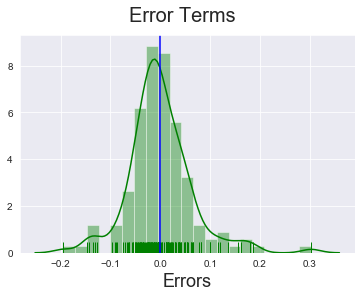

In [142]:
fig = plt.figure()
sb.distplot(res,rug=True,color='green')
plt.axvline(x=0,color="blue")
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

##  Making Predictions Using the Final Model

In [143]:
df_test[num_vars] = scalar.transform(df_test[num_vars])
df_test.head()

,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Bore_stroke_ratio,wheel_len_ratio,torque,displacement,volume,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CarComp_Low,CarComp_Medium
160,0.313793,0.409756,0.341667,0.460177,0.235066,0.2,0.139623,0.404762,0.424242,0.12500,0.091667,0.265306,0.694444,0.810811,0.072382,0.347300,0.497759,0.120302,0.149174,0.312339,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
186,0.368966,0.497561,0.433333,0.699115,0.305275,0.2,0.181132,0.404762,0.611111,0.12500,0.154167,0.448980,0.388889,0.459459,0.093295,0.205431,0.411363,0.157688,0.193101,0.472097,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
59,0.420690,0.596748,0.516667,0.522124,0.347944,0.2,0.230189,0.563492,0.606061,0.10000,0.150000,0.265306,0.361111,0.405405,0.102964,0.281913,0.303067,0.188150,0.243962,0.495218,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
165,0.272414,0.448780,0.308333,0.424779,0.301396,0.2,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.324324,0.115479,0.346239,0.347204,0.175814,0.166663,0.313145,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
140,0.231034,0.263415,0.291667,0.699115,0.291699,0.2,0.177358,0.746032,0.227273,0.10625,0.104167,0.102041,0.361111,0.378378,0.068652,0.741576,0.671616,0.167003,0.193065,0.288910,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0


In [144]:
df_test.head()

,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Bore_stroke_ratio,wheel_len_ratio,torque,displacement,volume,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CarComp_Low,CarComp_Medium
160,0.313793,0.409756,0.341667,0.460177,0.235066,0.2,0.139623,0.404762,0.424242,0.12500,0.091667,0.265306,0.694444,0.810811,0.072382,0.347300,0.497759,0.120302,0.149174,0.312339,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
186,0.368966,0.497561,0.433333,0.699115,0.305275,0.2,0.181132,0.404762,0.611111,0.12500,0.154167,0.448980,0.388889,0.459459,0.093295,0.205431,0.411363,0.157688,0.193101,0.472097,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
59,0.420690,0.596748,0.516667,0.522124,0.347944,0.2,0.230189,0.563492,0.606061,0.10000,0.150000,0.265306,0.361111,0.405405,0.102964,0.281913,0.303067,0.188150,0.243962,0.495218,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
165,0.272414,0.448780,0.308333,0.424779,0.301396,0.2,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.324324,0.115479,0.346239,0.347204,0.175814,0.166663,0.313145,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
140,0.231034,0.263415,0.291667,0.699115,0.291699,0.2,0.177358,0.746032,0.227273,0.10625,0.104167,0.102041,0.361111,0.378378,0.068652,0.741576,0.671616,0.167003,0.193065,0.288910,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0


In [145]:
df_test.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Bore_stroke_ratio,wheel_len_ratio,torque,displacement,volume,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CarComp_Low,CarComp_Medium
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.437764,0.559481,0.480376,0.559663,0.428470,0.232258,0.265673,0.556580,0.544314,0.209375,0.248858,0.393351,0.328405,0.363993,0.239439,0.337354,0.407381,0.272218,0.270293,0.481674,0.887097,0.177419,0.080645,0.338710,0.451613,0.096774,0.419355,0.032258,0.0,0.048387,0.806452,0.048387,0.064516,0.0,0.258065,0.0,0.112903,0.016129,0.500000,0.048387,0.016129,0.467742,0.435484
std,0.212861,0.189947,0.165440,0.215811,0.179488,0.088288,0.162820,0.228484,0.160738,0.273690,0.163376,0.192092,0.172009,0.181845,0.233076,0.172440,0.191147,0.176242,0.165451,0.212340,0.319058,0.385142,0.274512,0.477134,0.501716,0.298064,0.497482,0.178127,0.0,0.216335,0.398304,0.216335,0.247676,0.0,0.441142,0.0,0.319058,0.127000,0.504082,0.216335,0.127000,0.503032,0.499868
min,0.000000,0.056911,0.183333,0.141593,0.128394,0.200000,0.067925,-0.111111,-0.060606,0.000000,0.016667,0.000000,0.027778,-0.027027,0.007763,0.100348,0.049376,0.033069,-0.054744,0.045493,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.313793,0.459350,0.358333,0.384956,0.305275,0.200000,0.177358,0.404762,0.484848,0.093750,0.107292,0.265306,0.166667,0.216216,0.092342,0.205431,0.283530,0.138856,0.167574,0.317799,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.387931,0.547967,0.441667,0.588496,0.406129,0.200000,0.226415,0.563492,0.585859,0.125000,0.218750,0.346939,0.305556,0.351351,0.158991,0.324368,0.403652,0.219017,0.238327,0.466220,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
75%,0.570690,0.719919,0.516667,0.699115,0.564876,0.200000,0.316038,0.746032,0.641414,0.150000,0.295833,0.540816,0.444444,0.459459,0.317243,0.448249,0.521318,0.343231,0.322046,0.646794,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,0.750000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.182759,1.089431,0.975000,1.061947,0.935609,0.600000,0.932075,0.888889,0.863636,1.000000,0.662500,1.000000,0.694444,0.810811,1.112855,1.000000,0.981900,0.732226,0.918174,1.068636,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for the model building

In [146]:
y_test=df_test.pop('price')
X_test = df_test

In [147]:
#add a constant in X_test
X_test_sm=sm.add_constant(X_test)
X_test_sm.head()

,const,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,Bore_stroke_ratio,wheel_len_ratio,torque,displacement,volume,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CarComp_Low,CarComp_Medium
160,1.0,0.313793,0.409756,0.341667,0.460177,0.235066,0.2,0.139623,0.404762,0.424242,0.12500,0.091667,0.265306,0.694444,0.810811,0.347300,0.497759,0.120302,0.149174,0.312339,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
186,1.0,0.368966,0.497561,0.433333,0.699115,0.305275,0.2,0.181132,0.404762,0.611111,0.12500,0.154167,0.448980,0.388889,0.459459,0.205431,0.411363,0.157688,0.193101,0.472097,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
59,1.0,0.420690,0.596748,0.516667,0.522124,0.347944,0.2,0.230189,0.563492,0.606061,0.10000,0.150000,0.265306,0.361111,0.405405,0.281913,0.303067,0.188150,0.243962,0.495218,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
165,1.0,0.272414,0.448780,0.308333,0.424779,0.301396,0.2,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0.361111,0.324324,0.346239,0.347204,0.175814,0.166663,0.313145,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
140,1.0,0.231034,0.263415,0.291667,0.699115,0.291699,0.2,0.177358,0.746032,0.227273,0.10625,0.104167,0.102041,0.361111,0.378378,0.741576,0.671616,0.167003,0.193065,0.288910,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0


In [148]:
X_test_sm=X_test_sm[X_train_rfe12.columns]

In [149]:
X_test_sm.head()

,const,horsepower,fuelsystem_idi,CarComp_Low,CarComp_Medium
160,1.0,0.091667,0,1,0
186,1.0,0.154167,0,1,0
59,1.0,0.150000,0,1,0
165,1.0,0.266667,0,1,0
140,1.0,0.104167,0,1,0


In [150]:
# Making predictions using the 16th model
y_test_pred = rfe_lm.predict(X_test_sm)
y_test_pred[:10]

160    0.051692
186    0.083344
59     0.081234
165    0.140317
140    0.058022
64     0.176340
198    0.340931
75     0.368363
172    0.243865
104    0.336711
dtype: float64

In [151]:
#calculate accuracy
r2_score(y_test,y_test_pred)

0.8729054626140029

In [152]:
res = y_test - y_test_pred

Text(0.5, 0, 'Errors')

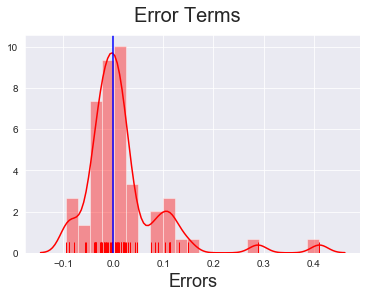

In [153]:
fig = plt.figure()
sb.distplot(res,rug=True,color='red')
plt.axvline(x=0,color="blue")
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

##  Model Evaluation


Text(0, 0.5, 'y_pred')

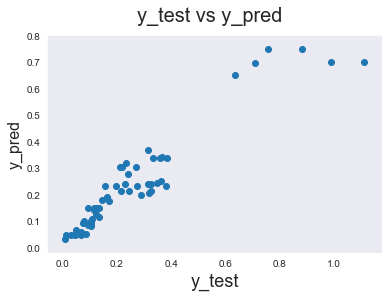

In [154]:
fig = plt.figure()
plt.grid()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

# Conclusion

In colclusion these are the four variables which can describe the price of the cars upto a good extent.

1. 'horsepower'
2. 'fuelsystem_idi'
3. 'CarComp_Low'
4. 'CarComp_Medium'